In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import smtplib


In [8]:
import pandas as pd
import numpy as np

# Load dataset
column_names = [ 
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Read the dataset
df = pd.read_csv("C:/Users/lavanya/OneDrive/Desktop/NIDS_pro/corrected.gz", names=column_names)

print(df.head())


   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp  private   SF        105        146     0   
1         0           udp  private   SF        105        146     0   
2         0           udp  private   SF        105        146     0   
3         0           udp  private   SF        105        146     0   
4         0           udp  private   SF        105        146     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                 254   
1               0       0    0  ...                 254   
2               0       0    0  ...                 254   
3               0       0    0  ...                 254   
4               0       0    0  ...                 254   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                    0.01   
1                     1.0                    0.01   
2                     1.0                    0.01   
3     

In [9]:
import sys
print(sys.executable)


c:\Users\lavanya\AppData\Local\Programs\Python\Python313\python.exe


In [10]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [11]:
import sklearn
print(sklearn.__version__)


1.6.1


In [12]:
import xgboost
print(xgboost.__version__)

3.0.0


In [13]:
df.to_csv("corrected_uncompressed.csv", index=False)

In [14]:
# Load dataset
df = pd.read_csv("corrected_uncompressed.csv")

# Encoding categorical features
categorical_cols = ['protocol_type', 'service', 'flag']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)


df['label'] = df['label'].str.strip()  # Remove trailing spaces if any

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
y_train_encoded = label_encoder.fit_transform(y_train)

# You can also transform the test labels similarly
y_test_encoded = label_encoder.transform(y_test)


In [16]:
# Train the XGBoost classifier
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf.fit(X_train, y_train_encoded)

c:\Users\lavanya\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:26:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
# Predict on test data
y_pred_encoded = clf.predict(X_test)

# Transform the encoded predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9807574832009774


c:\Users\lavanya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lavanya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lavanya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Classification Report:
                   precision    recall  f1-score   support

        apache2.       1.00      1.00      1.00       181
           back.       1.00      1.00      1.00       221
buffer_overflow.       0.33      0.33      0.33         3
   guess_passwd.       1.00      1.00      1.00       897
     httptunnel.       0.96      0.93      0.94        27
        ipsweep.       1.00      1.00      1.00        56
       mailbomb.       1.00      1.00      1.00       962
          mscan.       1.00      1.00      1.00       208
       multihop.       0.00      0.00      0.00         2
          named.       1.00      1.00      1.00         1
        neptune.       1.00      1.00      1.00     11756
           nmap.       1.00      1.00      1.00        15
         normal.       0.95      0.95      0.95     12004
           perl.       0.00      0.00      0.00         1
            pod.       1.00      1.00      1.00        18
      portsweep.       0.98      1.00      0.99

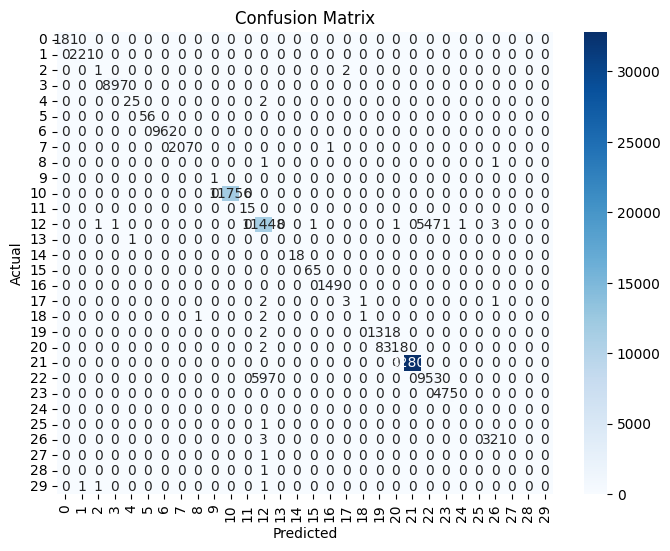

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [20]:
import joblib

joblib.dump(clf, 'trained_model.pkl')


['trained_model.pkl']

In [22]:
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

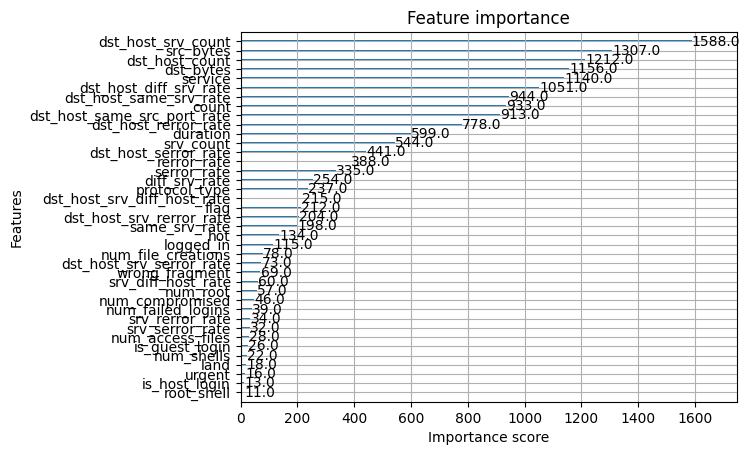

In [21]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(clf)
plt.show()
